In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

import pickle
import re

C:\Users\Chankoo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [26]:
query = """빈센트 반 고흐의 대표작 중 하나로 꼽히는 <별이 빛나는 밤>은 그가 고갱과 다툰 뒤 자신의 귀를 자른 사건 이후 생레미의 요양원에 있을 때 그린 것이다. 반 고흐에게 밤하늘은 무한함을 표현하는 대상이었고, 이보다 먼저 제작된 아를의 <밤의 카페 테라스>나 <론 강 위로 별이 빛나는 밤>에서도 별이 반짝이는 밤의 정경을 다루었다. 반 고흐는 동생 테오에게 쓴 편지에서 “오늘 아침 나는 해가 뜨기 한참 전에 창문을 통해 아무것도 없고 아주 커 보이는 샛별밖에 없는 시골을 보았다.”고 했다. 이 샛별은 그림 가운데 왼쪽에 있는 커다란 흰 별일 것이다. 그가 그린 밤하늘에서는 구름과 대기, 별빛과 달빛이 폭발하고 있다. 황량하고 짙은 파란색 하늘은 세상의 종말을 연상케 하고, 그 위로는 구름이 소용돌이치며 떠있다. 달과 별의 둘레에는 뿌옇게 무리가 져있다.

비연속적이고 동적인 터치로 그려진 하늘은 굽이치는 두꺼운 붓놀림으로 불꽃같은 사이프러스와 연결되고, 그 아래의 마을은 대조적으로 평온하고 고요하다. 마을은 있는 그대로 그린 것이 아니라 부분적으로는 고안되었는데, 교회 첨탑은 반 고흐의 고향 네덜란드를 연상시킨다. 그는 병실 밖으로 내다보이는 밤 풍경을 기억과 상상을 결합시켜 그렸는데, 이는 자연에 대한 반 고흐의 내적이고 주관적인 표현을 구현하고 있다. 수직으로 높이 뻗어 땅과 하늘을 연결하는 사이프러스는 전통적으로 무덤이나 애도와 연관된 나무이지만, 반 고흐는 죽음을 불길하게 보지 않았다. 

그는 “별을 보는 것은 언제나 나를 꿈꾸게 한다.”면서 “왜 하늘의 빛나는 점들에는 프랑스 지도의 검은 점처럼 닿을 수 없을까? 타라스콩이나 루앙에 가려면 기차를 타듯이, 우리는 별에 다다르기 위해 죽는다.”고 했다. 이 시기에 그의 필치는 더욱 두꺼워지고 더욱 열정적으로 변했으며, 꿈틀거리는 듯한 선은 별의 광채를 한층 두드러지게 한다. 이 시기의 특징인 회오리치는 듯 꿈틀거리는 필치는 강렬한 색과 결합되어 감정을 더욱 격렬하게 표현한다. 이 곡선의 화필은 굽이치는 운동감을 표현하면서, 그림 전체를 율동적인 흐름으로 통합한다.
"""

In [109]:
query="""제작배경
1888년, 반 고흐(Vincent Van Gogh, 1853-1890)는 프랑스 남부에 위치한 아를(Arles)에서 화가 공동체를 실현시키고자 했다. 반 고흐가 꿈 꾸는 화가 공동체란 여러 명의 화가가 한 공간에 모여 작품 토론도 하고 작품활동도 하는 것이었다. 반 고흐는 아를에 도착한 뒤 한동안 호텔에 머물다 라마르틴 광장(Place Lamartine)에 있는 집을 빌렸다. ‘노란집(Yellow House)’이라 불리는 이 곳에서 반 고흐는 다른 화가들과 함께 생활하길 원했다.

반 고흐는 동료화가들 중 특히 평소에 존경하던 고갱(Eugène Henri Paul Gauguin, 1848-1903)과 함께 하고 싶었다. 그는 5월부터 무려 5달 동안 고갱에게 편지를 썼고, 그의 동생 테오도르 반 고흐(Theodore Van Gogh, 1857-1890) 또한 고갱을 아를로 부르기 위해 노력했다. 긴 설득 끝에 고갱은 아를의 ‘노란 집’에 올 것을 약속했고 반 고흐는 그와 함께 생활할 보금자리를 정성스럽게 꾸미기 시작했다. 평소 해바라기 꽃을 유달리 좋아했던 반 고흐는 그들의 화실을 노란색의 해바라기로 가득 채우고 싶었다. 그러나 화실 전체를 해바라기로 장식하고자 했던 첫 계획과는 달리 반 고흐는 연작 중 잘 된 작품 두 점만을 고갱이 쓸 방에 걸어두었다. 1888년 완성된 12송이의 해바라기가 그려진 <해바라기>는 8월에 고흐가 그린 <해바라기>연작 중 하나이다.

작품과 표현기법
반 고흐는 선보다는 색채를 중시한 몽티셀리(Adolphe Joseph Thomas Monticelli, 1824-1886)를 들라크루아(Ferdinand Victor Eugène Delacroix, 1798-1863)의 정신을 계승한 색채의 대가로 생각했다. 반 고흐는 특히 몽티셀리의 정물화에 영향을 받았다. 그의 정물화는 강렬한 색채와 두꺼운 붓 터치로 인한 질감표현이 특징이다. 반 고흐는 몽티셀리의 화풍을 수용해 화병에 꽂힌 꽃들을 그리기 시작했다. 이 그림에서 우리는 화병에 꽂혀 있는 12송이의 해바라기를 볼 수 있다. 반 고흐는 동생 테오에게 보낸 편지에 ‘해바라기는 빨리 시들어버리기 때문에 나는 매일 아침 일찍부터 황혼이 올 무렵까지 해바라기를 그린다’라 적고 있다. 그래서일까? 그림 속 해바라기는 제각각 다른 모습이다. 어떤 해바라기는 활짝 피어있으나 또 다른 해바라기는 바닥을 향한 채 시들어가고 있다. 상상의 세계가 아닌 실제 보이는 것을 재빠르게 그려낼 때 포착 가능한 시간의 흐름을 이 작품에서 느낄 수 있다.

반 고흐는 고갱과 함께 머물 집을 “파란색과 노란색의 심포니” 구도를 가진 장식적인 해바라기들로 꾸미고 싶었다. 반 고흐는 평소 색채 효과에 지대한 관심을 가지고 있었고 이를 작품에 적용하고자 했다. 보색대비에 의한 색채효과를 선호한 반 고흐는 희미한 말라카이트 그린부터 로열 블루까지 다양한 푸른색을 배경으로 따뜻한 노란색의 해바라기를 그리고자 했다. 해바라기의 노란색은 반 고흐가 개인적으로 좋아한 색이기도 하다. 

베르나르(Émile Bernard, 1868 -1941)는 태양의 색깔을 닮은 해바라기의 노란 빛을 “반 고흐가 회화에서뿐만 아니라 마음 속에서도 꿈꿔왔던 빛”이라 말했다. <해바라기>란 작품을 살펴보면, 한 화면에 노란색의 해바라기와 대비를 이루는 옅은 녹색을 배경을 배치함으로써 그가 원했던 장식적인 효과를 얻고 있음을 볼 수 있다. 또한 반 고흐 특유의 임파스토(impasto: 유화물감을 두껍게 칠하여 그림을 그리는 것을 이르는 말)기법은 화병의 꽃들을 실제 꽃들처럼 생생한 질감을 부여하고 있다.
"""

In [2]:
query = """난장이로 상징되는 못 가진 자와 거인으로 상징되는 가진 자 사이의 대립적 세계관을 바탕으로 우리시대의 불행과 행운, 질곡과 신생의 역설을 고스란히 보여주는 조세희의 연작소설. 1978년 초판을 발행한 이후, 최인훈의 광장과 더불어 100쇄를 넘어섰다. 작가는 왜소하고 병신스런 모습의 <난장이>를 통해 산업시대에 접어든 우리 사회의 허구와 병리를 적나라하게 폭로하면서 사람이 사람답게 살아야 할 꿈과 자유에의 열망을 보여준다. 표지는 판화가 이철수 씨의 판화로 꾸몄다. """

In [3]:
tw = Twitter() #형태소 분석기로 Twitter를 이용한다

In [7]:
query_tokens = tw.nouns(query) #query 텍스트에서 명사를 추출해 토큰화한다

In [8]:
query_bow = dic.doc2bow(query_tokens) # query_tokens을 Bag of Words 형태로 바꿔준다

In [22]:
ldamodel = LdaModel.load('lda_exhb_10.model') # 미리 학습된 LDA 모델을 불러온다 토픽의 수는 10

In [9]:
query_topics = ldamodel.get_document_topics(query_bow) # query_bow를 토대로 query의 토픽을 추정한다. 확률값이 리턴된다
query_topics

[(1, 0.048866034),
 (2, 0.3368581),
 (3, 0.23137134),
 (4, 0.053989172),
 (6, 0.1907102),
 (7, 0.13036011)]

In [10]:
np.max(query_topics, axis=0)[1] #이중 가장 확률이 높게 추정된 토픽을 뽑는다

0.3368580937385559

In [11]:
query_topic_weights = [(query_topic[0], query_topic[1]/np.max(query_topics, axis=0)[1]) for query_topic in query_topics] # 확률을 가중치로 변환한다

In [12]:
query_topic_weights_dic = dict.fromkeys(range(10))
query_topic_weights_dic.fromkeys(range(10))
for topic, weight in query_topic_weights:
    query_topic_weights_dic[topic] = weight

In [13]:
query_topic_weights_dic # 변환된 가중치, 최대값이 1이다

{0: None,
 1: 0.14506415152964475,
 2: 1.0,
 3: 0.6868510730082291,
 4: 0.16027274684904524,
 5: None,
 6: 0.5661440392983081,
 7: 0.38698821259546734,
 8: None,
 9: None}

In [56]:
data = pd.read_excel('data_final.xlsx') #전시데이터를 불러온다

In [14]:
d2vmodel = Doc2Vec.load('d2v_exhb_100.model') # 저장된 pv-dm모델을 불러온다

In [14]:
new_vector = d2vmodel.infer_vector(query_tokens,steps=100) # pv-dm 모델에 query_tokens을 넣어  query_document의  벡터를 추정한다
sims = d2vmodel.docvecs.most_similar([new_vector],topn=30) # 전시데이터와 유사도 계산하여 높은 유사도를 뽑는다
sims

[(14112, 0.4333101212978363),
 (9111, 0.4212932288646698),
 (9178, 0.4061037600040436),
 (2705, 0.4049161374568939),
 (4530, 0.40187954902648926),
 (10915, 0.3983769416809082),
 (5255, 0.3890469968318939),
 (14641, 0.38861584663391113),
 (5920, 0.3850060701370239),
 (14284, 0.3816514015197754),
 (7521, 0.3809058666229248),
 (15550, 0.3803422451019287),
 (5750, 0.3786550760269165),
 (16374, 0.374236524105072),
 (6828, 0.3723606467247009),
 (1788, 0.37079596519470215),
 (17229, 0.3704376220703125),
 (1282, 0.3678186535835266),
 (1276, 0.3665498197078705),
 (3511, 0.3653607964515686),
 (3382, 0.3637676537036896),
 (2169, 0.36366593837738037),
 (10883, 0.362981915473938),
 (11492, 0.3618461787700653),
 (18498, 0.3603888154029846),
 (14330, 0.3597123622894287),
 (17693, 0.3592988848686218),
 (7792, 0.3586561679840088),
 (910, 0.3577273190021515),
 (13754, 0.3566104471683502)]

In [15]:
for sim in sims:
    doc_topics = []
    for topic in re.sub('[^0-9]','',data.iloc[sim[0], 14]): # ex '89'
        doc_topics.append(int(topic))

In [16]:
recs = []
for sim in sims:
    doc_topics = []
    for topic in re.sub('[^0-9]','',data.iloc[sim[0], 14]): # ex '89'
        doc_topics.append(int(topic))
    if doc_topics == []: #topic 지정 안된 doc의 경우
        recs.append((sim[0],sim[1],'!!!')) # sim을 그대로 저장
        continue
    else:
        tmp =[]
        for doc_topic in doc_topics: # topic 지정된 doc의 경우 
            weight = query_topic_weights_dic[doc_topic]
            if weight ==None:
                weight = 0
                
            tmp.append(sim[1]+sim[1]*weight*0.3) # 가중치 더해 저장
            
        recs.append( (sim[0],np.max(tmp)) )

In [17]:
sorted(recs, key = lambda tpl: tpl[1], reverse=True)

[(9178, 0.5279348880052567),
 (10915, 0.5178900241851807),
 (14284, 0.49614682197570803),
 (16374, 0.4865074813365936),
 (4530, 0.48468896886716145),
 (6828, 0.4840688407421112),
 (11492, 0.4704000324010849),
 (9111, 0.4702038829497433),
 (14641, 0.4686922100084621),
 (17693, 0.4670885503292084),
 (5920, 0.4643386198535128),
 (5750, 0.45667896960764653),
 (1282, 0.4436096446494128),
 (3382, 0.4387239146853091),
 (10883, 0.43777627091169496),
 (5255, 0.4342139774077766),
 (14112, 0.4333101212978363, '!!!'),
 (910, 0.43143893687244694),
 (2705, 0.4049161374568939),
 (13754, 0.3980116590311153),
 (7521, 0.3809058666229248),
 (15550, 0.3803422451019287),
 (1788, 0.37079596519470215, '!!!'),
 (17229, 0.3704376220703125),
 (1276, 0.3665498197078705, '!!!'),
 (3511, 0.3653607964515686),
 (2169, 0.36366593837738037, '!!!'),
 (18498, 0.3603888154029846),
 (14330, 0.3597123622894287),
 (7792, 0.3586561679840088)]

In [18]:
sims

[(14112, 0.4333101212978363),
 (9111, 0.4212932288646698),
 (9178, 0.4061037600040436),
 (2705, 0.4049161374568939),
 (4530, 0.40187954902648926),
 (10915, 0.3983769416809082),
 (5255, 0.3890469968318939),
 (14641, 0.38861584663391113),
 (5920, 0.3850060701370239),
 (14284, 0.3816514015197754),
 (7521, 0.3809058666229248),
 (15550, 0.3803422451019287),
 (5750, 0.3786550760269165),
 (16374, 0.374236524105072),
 (6828, 0.3723606467247009),
 (1788, 0.37079596519470215),
 (17229, 0.3704376220703125),
 (1282, 0.3678186535835266),
 (1276, 0.3665498197078705),
 (3511, 0.3653607964515686),
 (3382, 0.3637676537036896),
 (2169, 0.36366593837738037),
 (10883, 0.362981915473938),
 (11492, 0.3618461787700653),
 (18498, 0.3603888154029846),
 (14330, 0.3597123622894287),
 (17693, 0.3592988848686218),
 (7792, 0.3586561679840088),
 (910, 0.3577273190021515),
 (13754, 0.3566104471683502)]

In [19]:
data.iloc[9178,:].링크

'http://www.arthub.co.kr/sub01/board03_view.htm?No=2669'

In [179]:
# with open('artists_final.dic','rb') as file:
#     artists = pickle.load(file)

In [169]:
# d2vArtistmodel = Doc2Vec.load('d2v_artist_100.model')

In [177]:
new_vector = d2vArtistmodel.infer_vector(query_tokens,steps=100) 
sims = d2vArtistmodel.docvecs.most_similar([new_vector],topn=30)
sims

[('김근중', 0.5952833890914917),
 ('홍지윤', 0.5712342858314514),
 ('임동식', 0.5647003650665283),
 ('임희성', 0.5604411959648132),
 ('김춘수', 0.5504629611968994),
 ('정종미', 0.5488826632499695),
 ('지석철', 0.5463259816169739),
 ('임자혁', 0.5430823564529419),
 ('이길우', 0.542384684085846),
 ('김홍주', 0.5394816398620605),
 ('조종성', 0.5344670414924622),
 ('최경한', 0.5333976745605469),
 ('김건일', 0.5323827862739563),
 ('오원배', 0.5323002338409424),
 ('황호섭', 0.5291106700897217),
 ('신미혜', 0.528285026550293),
 ('김중식', 0.5277608633041382),
 ('김범석', 0.5258913040161133),
 ('황혜선', 0.5256236791610718),
 ('사윤택', 0.5254772901535034),
 ('심철웅', 0.5253597497940063),
 ('홍승혜', 0.5242776870727539),
 ('김혜련', 0.5229553580284119),
 ('정승', 0.5228352546691895),
 ('홍지연', 0.5227066874504089),
 ('유근택', 0.5213740468025208),
 ('샌정(Sen Chung)', 0.5204361081123352),
 ('박종필', 0.5203425884246826),
 ('이현호', 0.5195127725601196),
 ('이종구', 0.5191308856010437)]

In [20]:
# artists['김근중']

In [193]:
artist_name = '김근중'

In [194]:
art_nouns = tw.nouns(''.join(artists[artist_name]))

In [192]:
with open('TFIDF_artists_nouns_final.dic','rb') as file:
    TFIDF = pickle.load(file)

In [196]:
art_nouns_refined = []
for noun in art_nouns:
    if TFIDF[artist_name][noun] >1:
        art_nouns_refined.append(noun)

In [197]:
nouns_count = Counter(art_nouns_refined)

(-0.5, 399.5, 199.5, -0.5)

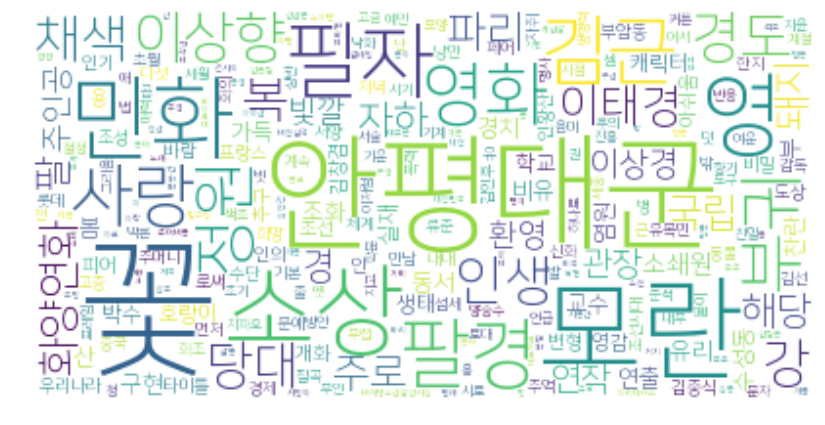

In [198]:
font_path = 'C:\\WINDOWS\\Fonts\\NanumSquareL.ttf'

cloud = WordCloud(font_path=font_path,background_color='white',max_words=500).generate_from_frequencies(nouns_count)
plt.figure(figsize=(14,14))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')